In [1]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import leagueleaders
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import PlayerDashboardByGeneralSplits
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(20, 6))


<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [2]:
df = leagueleaders.LeagueLeaders(season = "2023-24", timeout=60)
df

In [3]:
df = df.get_data_frames()[0]

In [4]:
df.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [5]:
df.sort_values(by = "EFF", ascending= False)

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
4,203999,5,Nikola Jokić,1610612743,DEN,79,2737,822,1411,0.583,...,976,708,108,68,237,194,2085,3039,2.99,0.46
25,1627734,26,Domantas Sabonis,1610612758,SAC,82,2928,634,1068,0.594,...,1120,673,74,48,272,250,1593,2679,2.47,0.27
2,203507,3,Giannis Antetokounmpo,1610612749,MIL,73,2567,837,1369,0.611,...,841,476,87,79,250,210,2222,2655,1.90,0.35
0,1629029,1,Luka Dončić,1610612742,DAL,70,2624,804,1652,0.487,...,647,686,99,38,282,149,2370,2580,2.43,0.35
11,203076,12,Anthony Davis,1610612747,LAL,76,2700,713,1283,0.556,...,961,266,91,178,159,177,1876,2548,1.67,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1630622,563,Jalen Crutcher,1610612740,NOP,1,3,0,1,0.000,...,0,0,0,0,0,0,0,-1,0.00,0.00
562,1641847,563,Andrew Funk,1610612741,CHI,5,13,0,4,0.000,...,0,0,1,1,0,0,0,-2,0.00,0.00
558,1630563,557,Joshua Primo,1610612746,LAC,2,10,1,3,0.333,...,1,0,0,1,4,0,2,-2,0.00,0.00
568,1629232,563,Kaiser Gates,1610612740,NOP,1,7,0,4,0.000,...,1,0,0,0,0,0,0,-3,0.00,0.00


In [6]:
df["EFF"].describe()

count     572.000000
mean      570.791958
std       559.774048
min        -4.000000
25%        92.000000
50%       412.500000
75%       909.500000
max      3039.000000
Name: EFF, dtype: float64

In [7]:
df_superstar_candidate = df[
    (df["GP"] >= 50) &
    ((df["MIN"] / df["GP"]) >= 30) &
    (df["EFF"] >= 910)
]
df_superstar_candidate



,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1629029,1,Luka Dončić,1610612742,DAL,70,2624,804,1652,0.487,...,647,686,99,38,282,149,2370,2580,2.43,0.35
1,1628983,2,Shai Gilgeous-Alexander,1610612760,OKC,75,2553,796,1487,0.535,...,415,465,150,67,162,184,2254,2416,2.87,0.93
2,203507,3,Giannis Antetokounmpo,1610612749,MIL,73,2567,837,1369,0.611,...,841,476,87,79,250,210,2222,2655,1.90,0.35
3,1628973,4,Jalen Brunson,1610612752,NYK,77,2726,790,1648,0.479,...,278,519,70,13,186,144,2212,1972,2.79,0.38
4,203999,5,Nikola Jokić,1610612743,DEN,79,2737,822,1411,0.583,...,976,708,108,68,237,194,2085,3039,2.99,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,201950,126,Jrue Holiday,1610612738,BOS,69,2263,331,689,0.480,...,373,333,61,53,124,108,860,1186,2.69,0.49
128,1629622,129,Max Strus,1610612739,CLE,70,2239,304,728,0.418,...,338,283,64,29,112,170,853,1011,2.53,0.57
133,1630529,134,Herbert Jones,1610612740,NOP,76,2321,293,588,0.498,...,272,199,105,62,93,224,837,1066,2.14,1.13
143,1630596,144,Evan Mobley,1610612739,CLE,50,1532,320,552,0.580,...,468,160,45,72,90,134,785,1160,1.78,0.50


In [8]:
df_superstar_candidate["EFF_per_game"] = df_superstar_candidate["EFF"] / df_superstar_candidate["GP"]
df_superstar_candidate["PTS_per_game"] = df_superstar_candidate["PTS"] / df_superstar_candidate["GP"]
df_superstar_candidate["AST_per_game"] = df_superstar_candidate["AST"] / df_superstar_candidate["GP"]
df_superstar_candidate["BLK_per_game"] = df_superstar_candidate["BLK"] / df_superstar_candidate["GP"]
df_superstar_candidate["REB_per_game"] = df_superstar_candidate["REB"] / df_superstar_candidate["GP"]
df_superstar_candidate


/var/folders/jl/m9thb3l97_14j8thlylmz5v40000gn/T/ipykernel_41747/1548647910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_superstar_candidate["EFF_per_game"] = df_superstar_candidate["EFF"] / df_superstar_candidate["GP"]
/var/folders/jl/m9thb3l97_14j8thlylmz5v40000gn/T/ipykernel_41747/1548647910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_superstar_candidate["PTS_per_game"] = df_superstar_candidate["PTS"] / df_superstar_candidate["GP"]
/var/folders/jl/m9thb3l97_14j8thlylmz5v40000gn/T/ipy

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,PF,PTS,EFF,AST_TOV,STL_TOV,EFF_per_game,PTS_per_game,AST_per_game,BLK_per_game,REB_per_game
0,1629029,1,Luka Dončić,1610612742,DAL,70,2624,804,1652,0.487,...,149,2370,2580,2.43,0.35,36.857143,33.857143,9.800000,0.542857,9.242857
1,1628983,2,Shai Gilgeous-Alexander,1610612760,OKC,75,2553,796,1487,0.535,...,184,2254,2416,2.87,0.93,32.213333,30.053333,6.200000,0.893333,5.533333
2,203507,3,Giannis Antetokounmpo,1610612749,MIL,73,2567,837,1369,0.611,...,210,2222,2655,1.90,0.35,36.369863,30.438356,6.520548,1.082192,11.520548
3,1628973,4,Jalen Brunson,1610612752,NYK,77,2726,790,1648,0.479,...,144,2212,1972,2.79,0.38,25.610390,28.727273,6.740260,0.168831,3.610390
4,203999,5,Nikola Jokić,1610612743,DEN,79,2737,822,1411,0.583,...,194,2085,3039,2.99,0.46,38.468354,26.392405,8.962025,0.860759,12.354430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,201950,126,Jrue Holiday,1610612738,BOS,69,2263,331,689,0.480,...,108,860,1186,2.69,0.49,17.188406,12.463768,4.826087,0.768116,5.405797
128,1629622,129,Max Strus,1610612739,CLE,70,2239,304,728,0.418,...,170,853,1011,2.53,0.57,14.442857,12.185714,4.042857,0.414286,4.828571
133,1630529,134,Herbert Jones,1610612740,NOP,76,2321,293,588,0.498,...,224,837,1066,2.14,1.13,14.026316,11.013158,2.618421,0.815789,3.578947
143,1630596,144,Evan Mobley,1610612739,CLE,50,1532,320,552,0.580,...,134,785,1160,1.78,0.50,23.200000,15.700000,3.200000,1.440000,9.360000


In [9]:
top10 = df_superstar_candidate.sort_values(by = "EFF_per_game", ascending= False).head(10)

<Axes: title={'center': 'Top 10 Players EFF per Game'}, xlabel='PLAYER'>

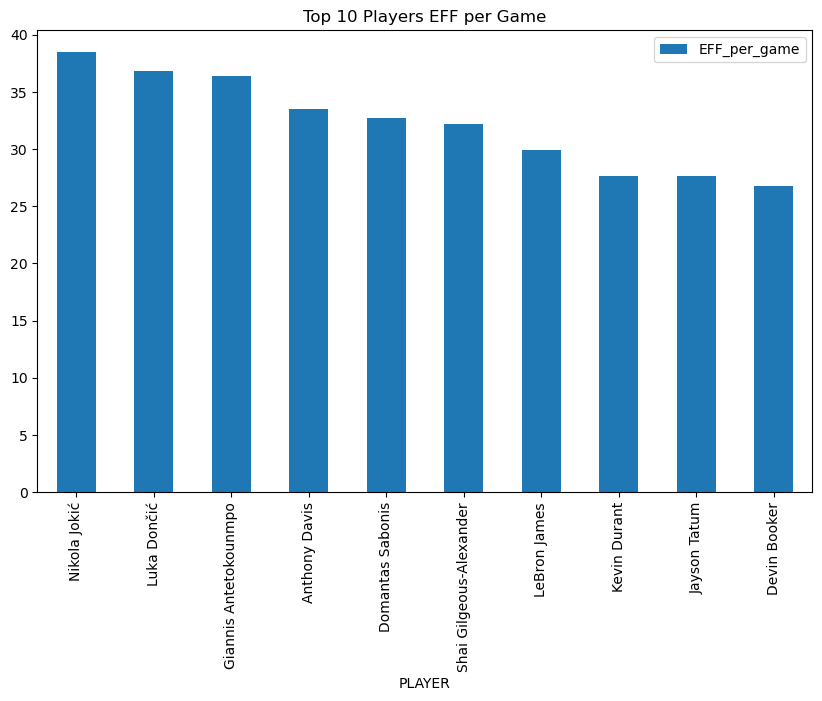

In [10]:
top10.plot(x = "PLAYER", y = "EFF_per_game", kind = "bar", figsize=(10, 6), title = "Top 10 Players EFF per Game")

<Axes: title={'center': 'Top 10 Players PTS per Game'}, xlabel='PLAYER'>

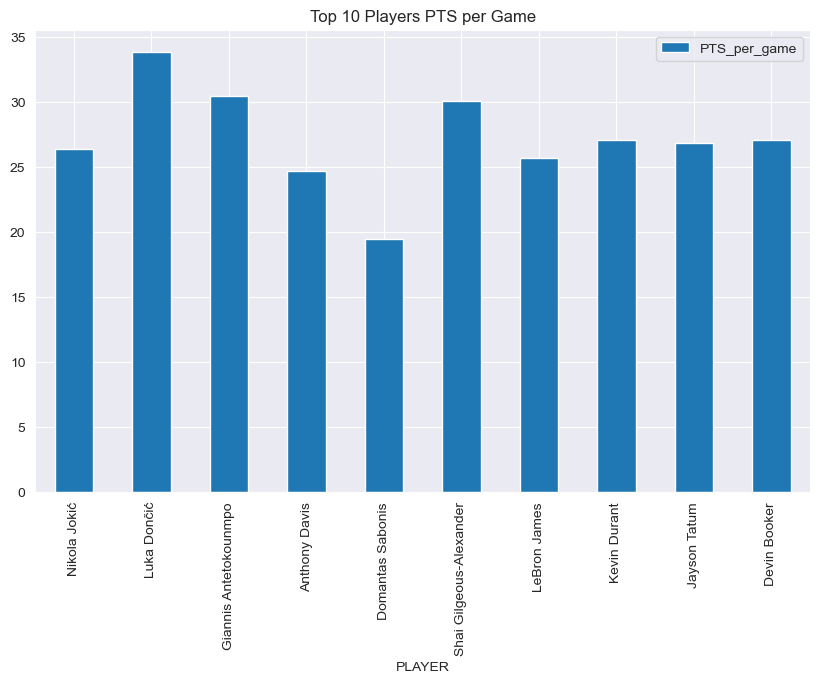

In [64]:

top10.plot(x = "PLAYER", y = "PTS_per_game", kind = "bar", figsize=(10, 6), title = "Top 10 Players PTS per Game")

<Axes: title={'center': 'Top 10 Players AST per Game'}, ylabel='PLAYER'>

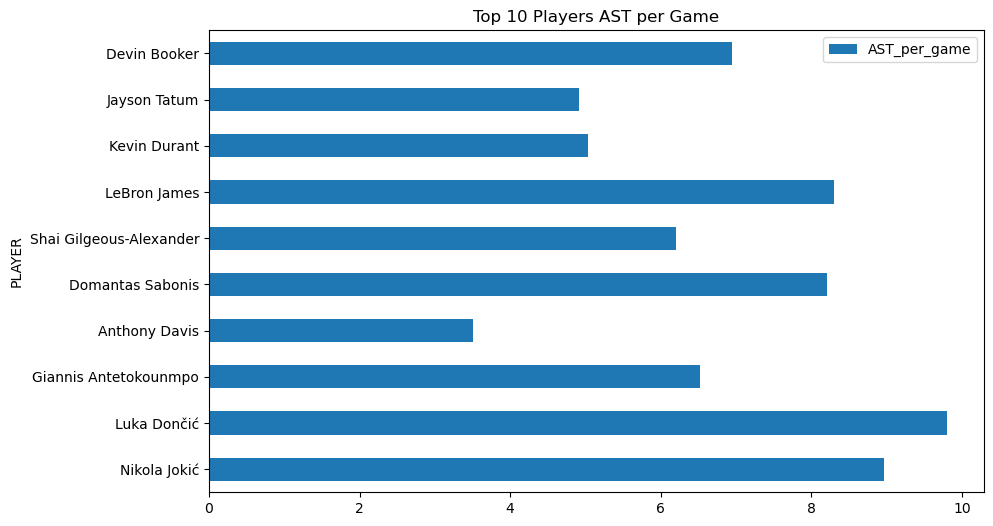

In [11]:
top10.plot(x = "PLAYER", y = "AST_per_game", kind = "barh", figsize=(10, 6), title = "Top 10 Players AST per Game")

<Axes: title={'center': 'Top 10 Players REB per Game'}, ylabel='PLAYER'>

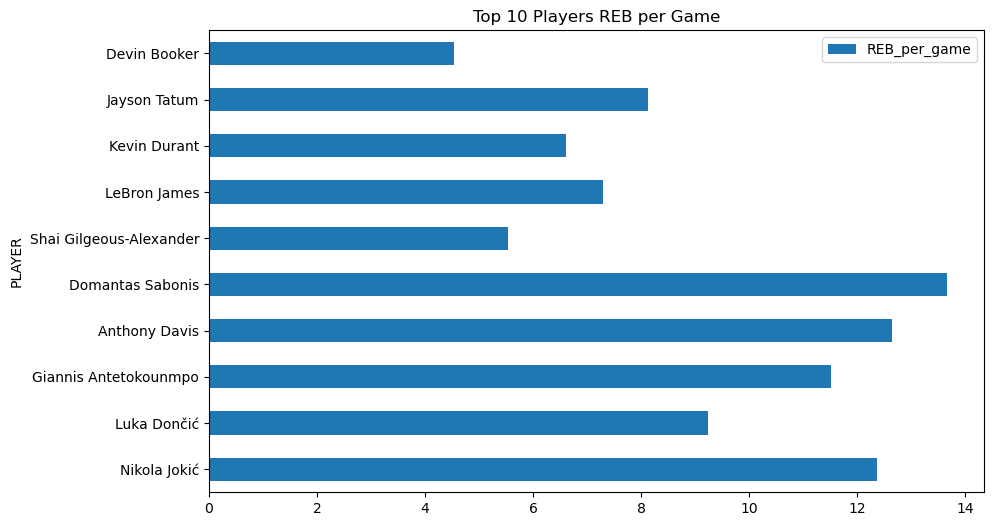

In [12]:
top10.plot(x = "PLAYER", y = "REB_per_game", kind = "barh", figsize=(10, 6), title = "Top 10 Players REB per Game")

In [13]:
top10_heatmap = top10[["PLAYER", "EFF_per_game", "PTS_per_game", "AST_per_game", "REB_per_game"]]
top10_heatmap = top10_heatmap.set_index("PLAYER")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [14]:
top10_heatmap["PTS_per_game"].max()

33.857142857142854

In [15]:
normalized_df = (top10_heatmap - top10_heatmap.min()) / (top10_heatmap.max() - top10_heatmap.min())


In [16]:
normalized_df

,EFF_per_game,PTS_per_game,AST_per_game,REB_per_game
PLAYER,,,,
Nikola Jokić,1.000000,0.482704,0.866988,0.857149
Luka Dončić,0.862850,1.000000,1.000000,0.516309
Giannis Antetokounmpo,0.821371,0.763083,0.479452,0.765806
Anthony Davis,0.579321,0.364329,0.000000,0.888949
Domantas Sabonis,0.506491,0.000000,0.747193,1.000000
Shai Gilgeous-Alexander,0.467557,0.736401,0.428571,0.109969
LeBron James,0.274356,0.432086,0.761234,0.303026
Kevin Durant,0.080533,0.531278,0.244444,0.226811
Jayson Tatum,0.077849,0.514509,0.225225,0.393489


<function matplotlib.pyplot.show(close=None, block=None)>

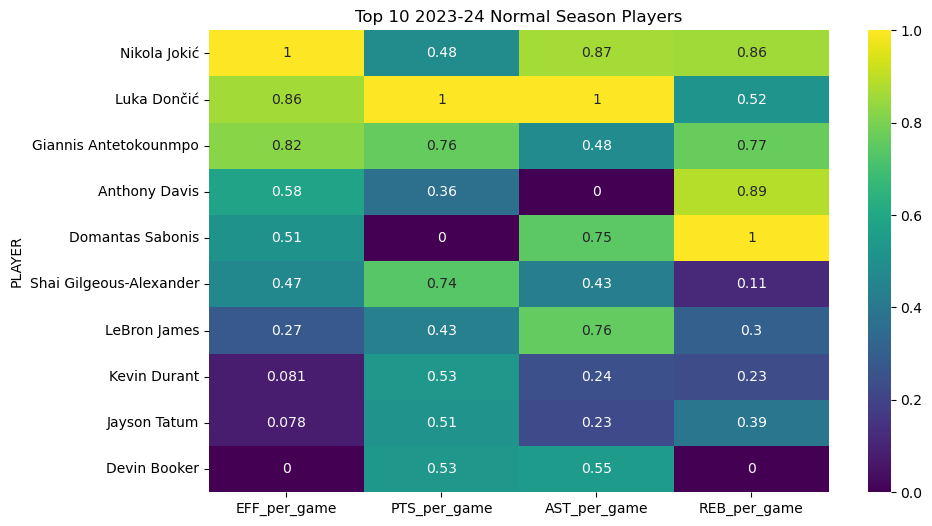

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df,annot=True,cmap = "viridis")
plt.title("Top 10 2023-24 Normal Season Players")
plt.show

In [18]:
players.find_players_by_full_name("Luka Doncic")


[{'id': 1629029,
  'full_name': 'Luka Dončić',
  'first_name': 'Luka',
  'last_name': 'Dončić',
  'is_active': True}]

In [19]:
players.find_players_by_last_name("Jokic")

[{'id': 203999,
  'full_name': 'Nikola Jokić',
  'first_name': 'Nikola',
  'last_name': 'Jokić',
  'is_active': True}]

In [20]:
players = [1629029, 203999]
data_frames = []

In [21]:
for player_id in players:
    data = PlayerDashboardByGeneralSplits(player_id=player_id, season="2023-24",timeout=60).get_data_frames()[0]
    player_name = "Doncic" if player_id == 1629029 else "Jokic"
    data['Player'] = player_name 
    data_frames.append(data)

In [22]:
df_mvp = pd.concat(data_frames, ignore_index=True)

In [23]:
df_mvp

,GROUP_SET,GROUP_VALUE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,Player
0,Overall,2023-24,70,46,24,0.657,2624.040000,804,1652,0.487,...,1,1,1,1,1,1,1,1,1,Doncic
1,Overall,2023-24,79,55,24,0.696,2736.533333,822,1411,0.583,...,1,1,1,1,1,1,1,1,1,Jokic


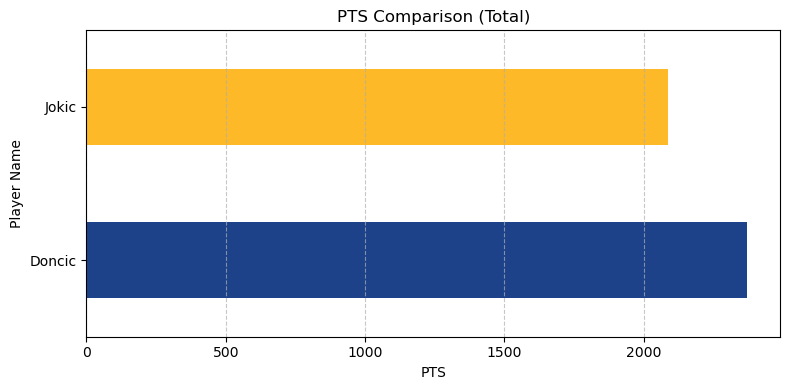

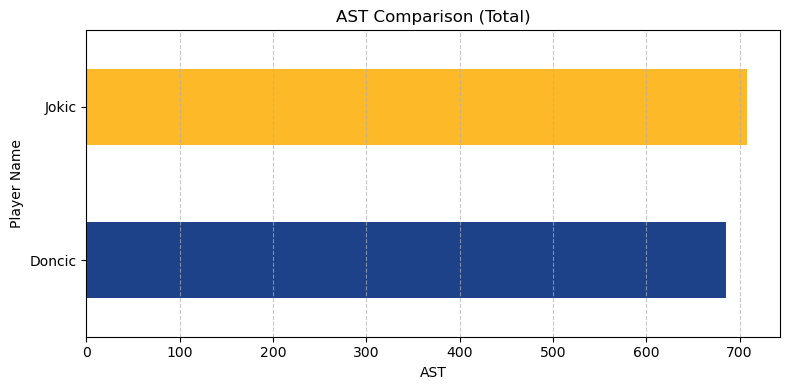

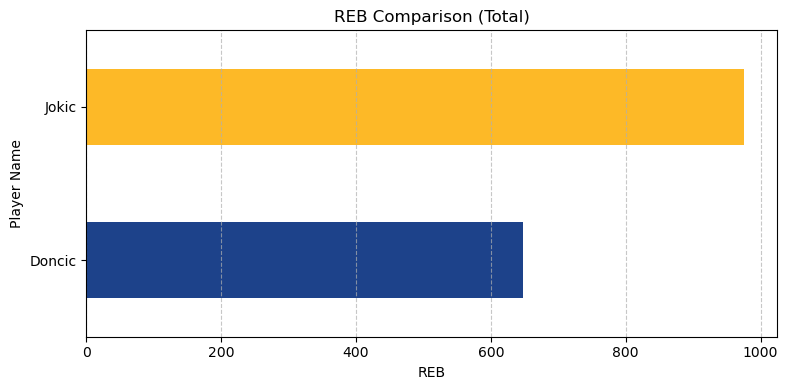

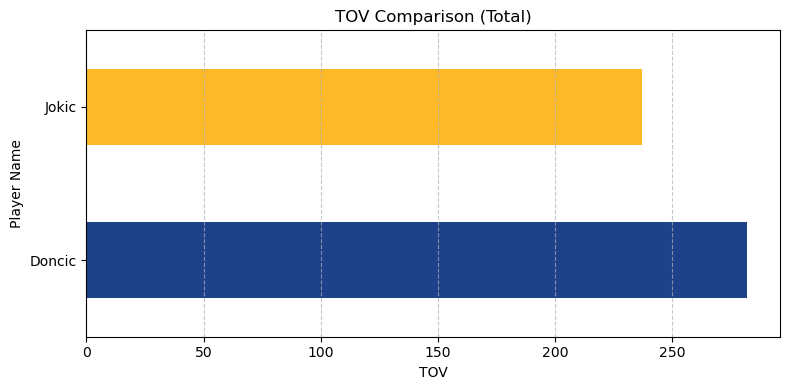

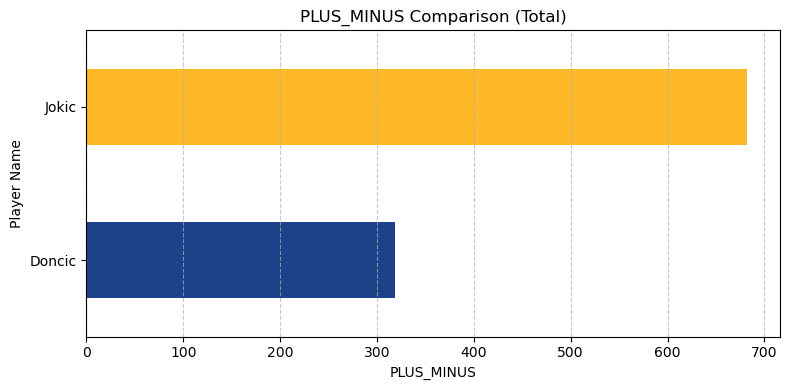

In [25]:


metrics = ['PTS', 'AST', 'REB', 'TOV', 'PLUS_MINUS']

for metric in metrics:
    df_mvp.plot(
        x="Player", 
        y=metric, 
        kind="barh", 
        figsize=(8, 4), 
        title=f"{metric} Comparison (Total)", 
        legend=False, 
        color=["#1D428A", "#FDB927"]
        )
    plt.xlabel(metric)
    plt.ylabel("Player Name")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


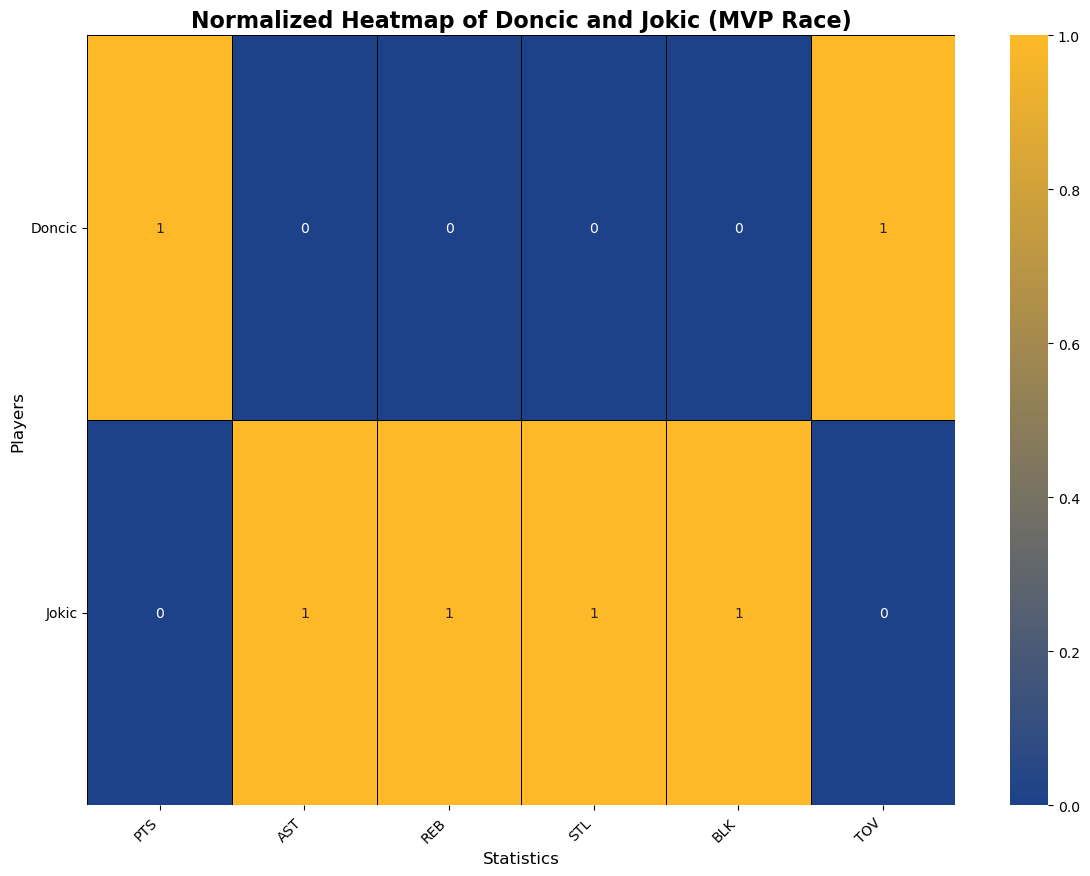

In [26]:

df_mvp_heatmap = df_mvp[['Player', 'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV']]

df_mvp_heatmap_normalized = (df_mvp_heatmap.drop('Player', axis=1) - df_mvp_heatmap.drop('Player', axis=1).min()) / (df_mvp_heatmap.drop('Player', axis=1).max() - df_mvp_heatmap.drop('Player', axis=1).min())

cmap = LinearSegmentedColormap.from_list("custom_palette", ["#1D428A", "#FDB927"])

df_mvp_heatmap_normalized['Player'] = df_mvp_heatmap['Player']

plt.figure(figsize=(14, 10))
heatmap_data = df_mvp_heatmap_normalized.set_index('Player')
sns.heatmap(heatmap_data, annot=True,
            cmap=cmap,
            cbar=True,
            linewidths=0.5,
            linecolor="black"
)
plt.title('Normalized Heatmap of Doncic and Jokic (MVP Race)', fontsize=16, weight='bold')
plt.xlabel('Statistics', fontsize=12)
plt.ylabel('Players', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()